<a href="https://colab.research.google.com/github/Elzfe09/RFM-Analysis/blob/main/RFM_Online_Retail_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

RFM Analysis (Recency, Frequency, Monertary)

- teknik analisis perilaku pelanggan yang digunakan dalam marketing dan cust segmentation

tujuan:
- mengetahui pelanggan terbaik
- menyesuaikan promosi
- meningkatkan retensi
- memprediksi potensi pelanggan


1. Recency:  

seberapa baru pelanggan melakukan transaksi terakhir
contoh: pelanggan A belanja 2 hari lalu (recency rendah, bagus)

2. Frequency:

seberapa sering pelanggan bertransaksi
contoh: pelanggan A belanja 12x dalam 3 bulan

3. Monetary:

seberapa banyak uang yang dibelanjakan
contoh: pelanggan A total belanja Rp. 1.200.000


-- Tujuan:
mengelompokkan pelanggan menjadi segmen segmen

a. Champion >> baru baru ini beli, sering, dan besar (pelanggan terbaik)

b. Loyal Customer >> sering beli tapi mungkin tidak selalu baru

c. At Risk >> pernah belanja besar, tapi sudah lama tidak belanja

d. Lost >> lama tidak belanja dan nilai kecil

In [18]:
data = pd.read_csv('/content/online_retail_II.csv')
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Cleaning and Explore Data

In [19]:
data.isnull().sum()
#remove null values
data.dropna(inplace = True)
data.duplicated().sum()
#remove duplicates
data.drop_duplicates(inplace = True)

In [20]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [21]:
## see country
data['Country'].value_counts()
#most majority customer from UK

,count
Country,
United Kingdom,716115
Germany,17339
EIRE,16014
France,13897
Netherlands,5137
Spain,3754
Belgium,3110
Switzerland,3058
Portugal,2414


In [22]:
data.dtypes
#change qty to int
data['Quantity']= data['Quantity'].astype(int)
#invoice date to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
#customer ID to int
data['Customer ID'] = data['Customer ID'].astype(int)

## Recency

In [23]:
#finding out each rfm values

#recency
# assume current year is 2011-06-01
current_day = '2012-01-01'
day = pd.to_datetime(current_day)

recency = data.groupby(['Customer ID']).agg(
    {'InvoiceDate': lambda x: (day - x.max()).days}
#mengurangi tanggal hari ini dengan waktu terbaru berbelanja tiap customer dan
#dihitung sdh berapa hari dari hari skrng dan wkt terakhir belanja(max)
)
recency

#customer 12346 belanja 133 hari lalu, begitu
#pling trakir belnja it 44 hari lalu, dan paling lama 546 hari / 1 thn lbh


,InvoiceDate
Customer ID,
12346,347
12347,24
12348,97
12349,40
12350,332
...,...
18283,25
18284,451
18285,682


## Frequency

In [24]:
# how many times each customer make an order?

data['StockCode'].drop_duplicates(inplace = True)

frequency = data.groupby(['Customer ID'])['StockCode'].count()
frequency

#from 2009 to 2011, most frequent cust purchase a product is 6731 times, less frequent is 1x only

,StockCode
Customer ID,
12346,47
12347,222
12348,51
12349,180
12350,17
...,...
18283,938
18284,29
18285,12


## Monetary



In [25]:
#create a revenue / amount column
data['Amount'] = data['Price'] * data['Quantity']
# find each customer total spending
monetary = data.groupby(['Customer ID'])['Amount'].sum()
monetary

,Amount
Customer ID,
12346,-51.74
12347,4921.53
12348,2019.40
12349,4404.54
12350,334.40
...,...
18283,2664.90
18284,436.68
18285,427.00


## Combined all RFM data

In [41]:
rfm = pd.concat([recency, frequency, monetary], axis = 1)
#change col name
rfm.reset_index()
rfm.columns = ['Recency', 'Frequency', 'Amount']
rfm

,Recency,Frequency,Amount
Customer ID,,,
12346,347,47,-51.74
12347,24,222,4921.53
12348,97,51,2019.40
12349,40,180,4404.54
12350,332,17,334.40
...,...,...,...
18283,25,938,2664.90
18284,451,29,436.68
18285,682,12,427.00


## Create Machine Learning Model for Clusters

In [42]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scaled = scale.fit_transform(rfm)

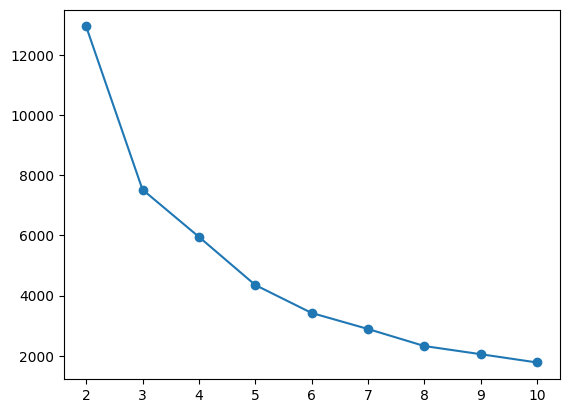

In [28]:
from sklearn.cluster import KMeans

#find no of cluster with elbow method

inertia = []
for k in range (2,11):
  kmeans = KMeans(n_clusters = k, random_state = 42)
  kmeans.fit(scaled)
  inertia.append(kmeans.inertia_)

plt.plot(range(2,11), inertia, marker ='o')

# 4 clusters seems optimal option

In [43]:
#make a cluster model
kmeans = KMeans(n_clusters= 4)
kmeans.fit_transform(scaled)
rfm['cluster'] = (kmeans.labels_+1)

In [44]:
rfm

,Recency,Frequency,Amount,cluster
Customer ID,,,,
12346,347,47,-51.74,4
12347,24,222,4921.53,2
12348,97,51,2019.40,2
12349,40,180,4404.54,2
12350,332,17,334.40,4
...,...,...,...,...
18283,25,938,2664.90,2
18284,451,29,436.68,4
18285,682,12,427.00,1


In [46]:
grouped_rfm = rfm.groupby(['cluster'])[['Recency','Frequency','Amount']].mean()
grouped_rfm

#cluster 1: recency 619 days no purchase from 2009 to 2011, around 27 item bought and spend $383
#cluster 2: recency 71 days no purchase from 2009 to 2011, around 178 item bought, and spend $3393
#cluster 3: recency 24 days no purchase from 2009 to 2011, around 4882 item bought, and spend $205.193,72
#cluster 4: recency 360 days no purchase from 2009 to 2011, around 52 item bought, and spend $849

#summary
#cluster 1: high recency, low item, low spend (bad) >> Lost
#cluster 2: higher recency, higher item sold, spend good >> Loyal
#cluster 3: lower recency, very large item sold, spend low >> Champion
#cluster 4: lower recency, large item bought, very large spend (very good) >> At Risk

,Recency,Frequency,Amount
cluster,,,
1,619.631138,26.635928,383.968062
2,71.340703,178.723356,3393.208562
3,24.461538,4882.461538,205193.718462
4,360.360153,52.130268,849.693366


## Group them

In [51]:
def func(data):
  if data['cluster'] ==1:
    return 'Lost'
  elif data['cluster'] == 2:
    return 'Loyal'
  elif data['cluster'] ==3:
    return 'Champion'
  else:
    return 'At Risk'
rfm['segment'] = rfm.apply(func, axis = 1)

rfm['segment'].value_counts()

,count
segment,
Loyal,3528
At Risk,1566
Lost,835
Champion,13


In [52]:
rfm_segment = rfm['segment'].value_counts().reset_index()
rfm_segment

,segment,count
0,Loyal,3528
1,At Risk,1566
2,Lost,835
3,Champion,13


In [53]:
import plotly.express as px
fig = px.bar(rfm_segment, x = 'segment', y=  'count')
fig.show()